#Nama : Muhammad Reza Giovanni

## IMPORT DATASET

In [1]:
!wget --no-check-certificate \
http://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip\
 -O /content/household_power_consumption.zip

--2020-09-17 13:24:29--  http://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20640916 (20M) [application/x-httpd-php]
Saving to: ‘/content/household_power_consumption.zip’

/content/household_ 100%[===================>]  19.68M  11.4MB/s    in 1.7s    

2020-09-17 13:24:31 (11.4 MB/s) - ‘/content/household_power_consumption.zip’ saved [20640916/20640916]



In [2]:
import zipfile,os

In [3]:
local_zip = 'household_power_consumption.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('household_power_consumption.txt',
                   sep=';', 
                   parse_dates={'dates' : ['Date', 'Time']},    
                   infer_datetime_format=True, 
                   low_memory=False, 
                   na_values=['nan','?'], 
                   index_col='dates')  

## CHECK MISSING VALUE

In [6]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
import numpy as np

In [8]:
for column in data.columns:
    data[column].replace(0, np.nan, inplace=True)
    data[column].fillna(method='ffill', inplace=True)
    
data.isnull().sum()

Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1           1019
Sub_metering_2              0
Sub_metering_3              0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


## CHOOSING ATTRIBUTE

In [10]:
import matplotlib.pyplot as plt

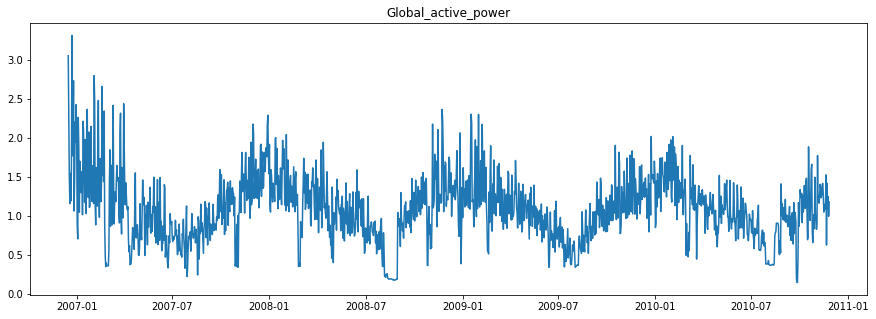

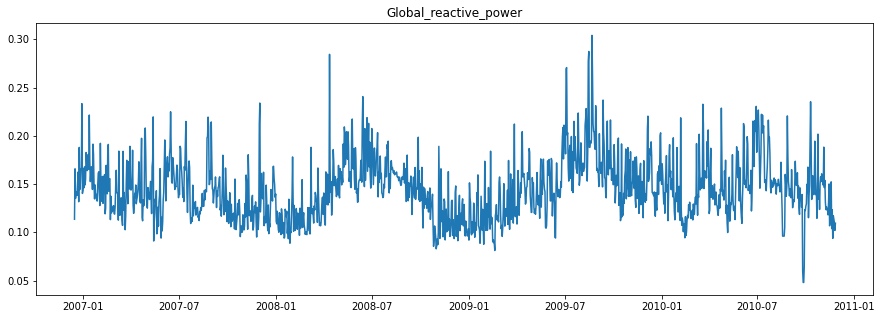

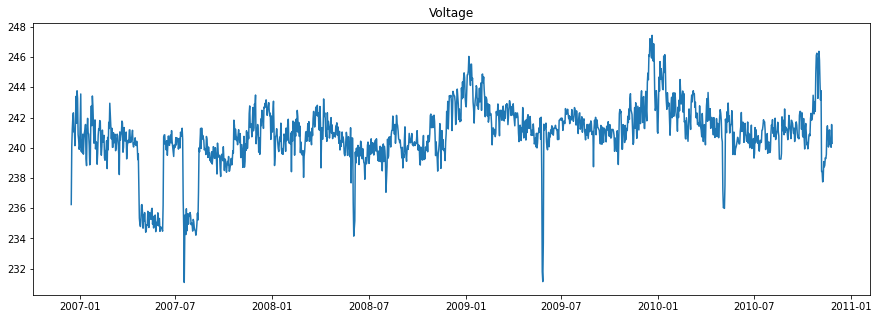

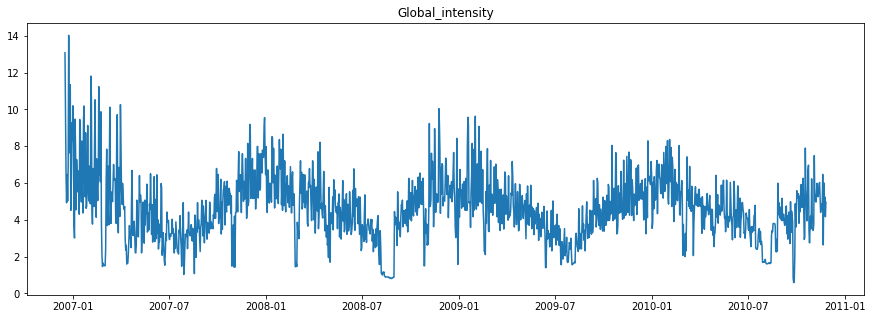

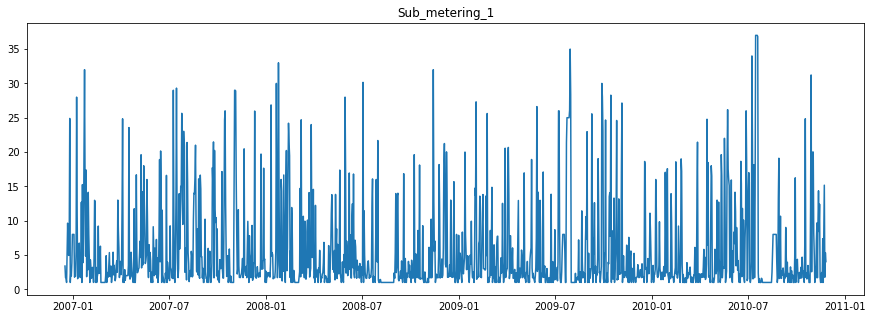

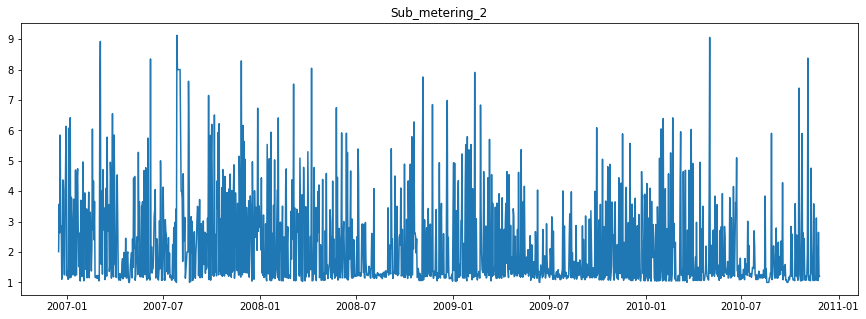

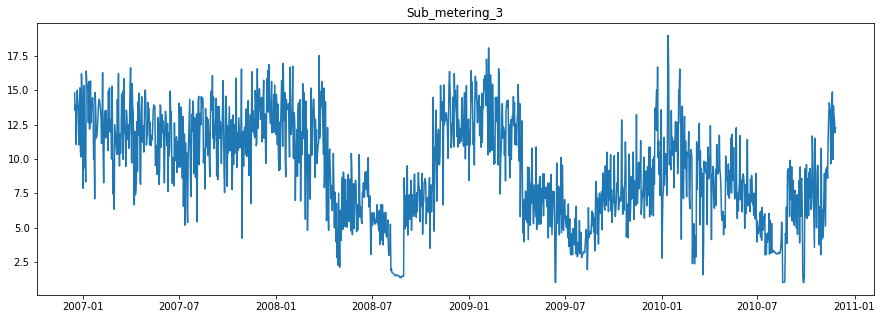

In [11]:
for column in data.columns:
    plt.figure(figsize=(15,5))
    mean = data[column].resample('d').mean()
    plt.plot(mean)
    plt.title(column, loc='center')
    plt.show()

In [12]:
data = data[['Global_intensity']]
data.tail()

,Global_intensity
dates,
2010-11-26 20:58:00,4.0
2010-11-26 20:59:00,4.0
2010-11-26 21:00:00,3.8
2010-11-26 21:01:00,3.8
2010-11-26 21:02:00,3.8


In [13]:
data = data['2007-07-01 00:00:00':]
data

,Global_intensity
dates,
2007-07-01 00:00:00,11.6
2007-07-01 00:01:00,11.2
2007-07-01 00:02:00,11.2
2007-07-01 00:03:00,11.2
2007-07-01 00:04:00,10.6
...,...
2010-11-26 20:58:00,4.0
2010-11-26 20:59:00,4.0
2010-11-26 21:00:00,3.8


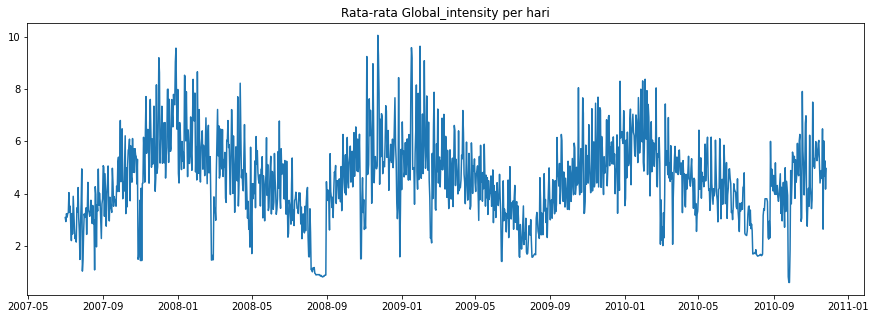

In [14]:
plt.figure(figsize=(15, 5))
mean = data['Global_intensity'].resample('d').mean()
plt.plot(mean)
plt.title('Rata-rata Global_intensity per hari', loc='center')
plt.show()

## RESAMPLING DATA

In [15]:
data_resample = data.resample('h').mean()
print('total data resample: ', data_resample.shape[0])

total data resample:  29878


In [16]:
data_resample

,Global_intensity
dates,
2007-07-01 00:00:00,10.500000
2007-07-01 01:00:00,4.233333
2007-07-01 02:00:00,3.376667
2007-07-01 03:00:00,1.240000
2007-07-01 04:00:00,2.196667
...,...
2010-11-26 17:00:00,7.216667
2010-11-26 18:00:00,6.620000
2010-11-26 19:00:00,7.056667


## FEATURE SCALLING

In [17]:
from sklearn import preprocessing

values = data_resample.values.reshape(-1,1)
values = values.astype('float32')
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [18]:
values

array([[10.5      ],
       [ 4.233333 ],
       [ 3.3766668],
       ...,
       [ 7.056667 ],
       [ 4.9133334],
       [ 3.8      ]], dtype=float32)

In [19]:
scaled

array([[0.35856053],
       [0.13378766],
       [0.10306075],
       ...,
       [0.23505503],
       [0.15817791],
       [0.11824487]], dtype=float32)

## SPLIT DATASET TO TRAIN VAL TEST

In [20]:
train_size = int(len(scaled) * 0.79)
val_size = int(len(scaled) * 0.2)
test_size = len(scaled) - train_size - val_size
train, val, test = scaled[0:train_size,:], scaled[train_size:-(test_size),:], scaled[-(test_size):,:]
print('train: ',len(train))
print('validation: ',len(val))
print('test: ',len(test))

train:  23603
validation:  5975
test:  300


In [21]:
import numpy as np
from itertools import chain

In [22]:
train = np.array(list(chain.from_iterable(train)))
val = np.array(list(chain.from_iterable(val)))
test = np.array(list(chain.from_iterable(test)))

In [23]:
def split_sequence(sequence, n_steps):
	x, y = list(), list()
	for i in range(len(sequence)):
		end_i = i + n_steps
		if end_i > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_i], sequence[end_i]
		x.append(seq_x)
		y.append(seq_y)
	return np.array(x), np.array(y)

In [24]:
n_steps = 10
train_x, train_y = split_sequence(train, n_steps)
val_x, val_y = split_sequence(val, n_steps)
test_x, test_y = split_sequence(test, n_steps)

In [25]:
n_features = 1
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], n_features))
val_x = val_x.reshape((val_x.shape[0], val_x.shape[1], n_features))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], n_features))

## THE CALLBACKS

In [26]:
import tensorflow as tf

In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.063 and logs.get('val_mae')<0.055):
      print("\nTraining sudah mencapai MAE < 6.3% skala data !!")
      self.model.stop_training = True
oee_callback = myCallback()

In [28]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 min_lr=0.000003,
                                                 patience=1
                                                 )

In [29]:
callbackk = [oee_callback, reduce_lr]

## THE MODEL

In [30]:
import tensorflow as tf
from keras.layers import LSTM

In [31]:
model = tf.keras.models.Sequential([tf.keras.layers.Bidirectional(LSTM(50, return_sequences=False), input_shape=(n_steps, n_features)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(30, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='relu'),
                                    tf.keras.layers.Dense(1)
                                    ])

## COMPILE

In [32]:
model.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100)               20800     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                3030      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 24,151
Trainable params: 24,151
Non-trainable params: 0
_________________________________________________________________


## FIT

In [34]:
hist = model.fit(train_x, 
                 train_y, 
                 epochs=100,
                 batch_size=120, 
                 validation_data=(val_x, val_y), 
                 verbose=1, 
                 callbacks=callbackk
                 )

Epoch 1/100
197/197 [==============================] - 4s 19ms/step - loss: 0.0138 - mae: 0.0874 - val_loss: 0.0063 - val_mae: 0.0572
Epoch 2/100
197/197 [==============================] - 3s 15ms/step - loss: 0.0094 - mae: 0.0692 - val_loss: 0.0062 - val_mae: 0.0528
Epoch 3/100
197/197 [==============================] - 3s 14ms/step - loss: 0.0090 - mae: 0.0663 - val_loss: 0.0060 - val_mae: 0.0550
Epoch 4/100
197/197 [==============================] - 3s 15ms/step - loss: 0.0088 - mae: 0.0656 - val_loss: 0.0061 - val_mae: 0.0567
Epoch 5/100
197/197 [==============================] - 3s 15ms/step - loss: 0.0089 - mae: 0.0659 - val_loss: 0.0061 - val_mae: 0.0557
Epoch 6/100
197/197 [==============================] - 3s 15ms/step - loss: 0.0088 - mae: 0.0655 - val_loss: 0.0061 - val_mae: 0.0556
Epoch 7/100
197/197 [==============================] - 3s 15ms/step - loss: 0.0089 - mae: 0.0655 - val_loss: 0.0061 - val_mae: 0.0556
Epoch 8/100
197/197 [==============================] - 3s 15ms

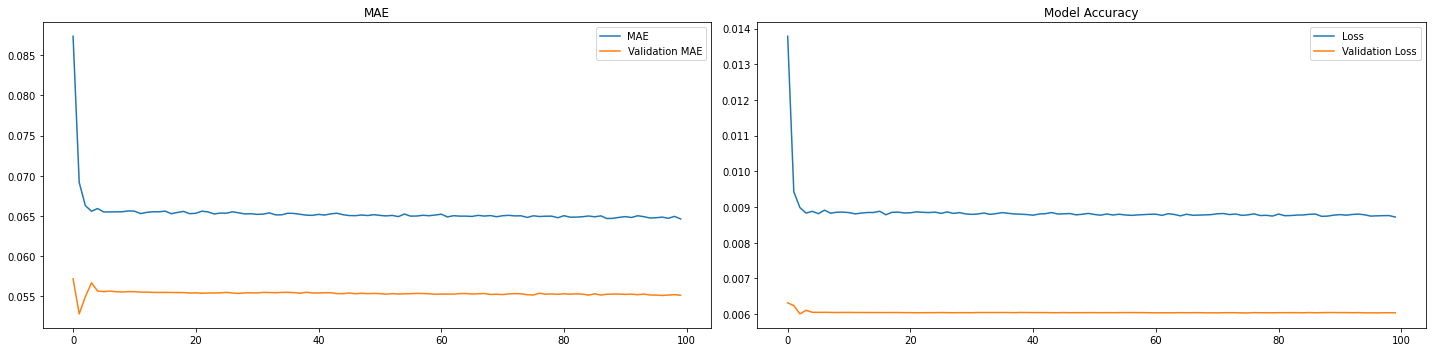

In [35]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.plot(hist.history['mae'])
ax1.plot(hist.history['val_mae'])
ax1.set_title('MAE')
ax1.legend(["MAE", "Validation MAE"])

ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.set_title('Model Accuracy')
ax2.legend(["Loss","Validation Loss"])

plt.tight_layout()

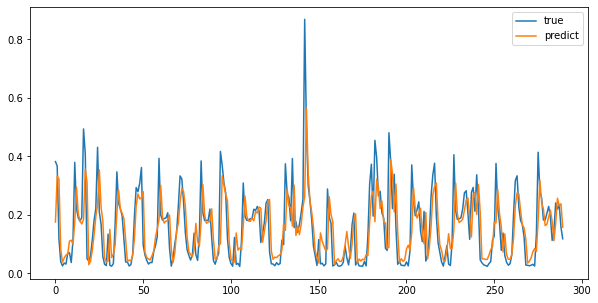

In [36]:
y_pred = model.predict(test_x)
plt.figure(figsize=(10,5))
plt.plot(test_y, label='true')
plt.plot(y_pred, label='predict')
plt.legend()
plt.show()

In [37]:
# Balikkan skala nilai prdeiksi ke nilai semula
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))
test_y_inverse = scaler.inverse_transform(test_y.reshape(-1, 1))

In [38]:
# Hitung skala data
min_value = data_resample.values.min()
max_value = data_resample.values.max()
data_scale = max_value - min_value
print('min_sum:', min_value)
print('max_sum:', max_value)
print('skala data:', data_scale)
print('MAE < 10% skala data = ', (0.1 * data_scale))

min_sum: 0.503333333333333
max_sum: 28.38333333333333
skala data: 27.879999999999995
MAE < 10% skala data =  2.788


In [39]:
# Hitung MAE
forecast = y_pred_inverse
actual = test_y_inverse
errors = forecast - actual
mae = np.abs(errors).mean()
print(f'Test MAE: {mae:.2f}')

Test MAE: 1.70
